<a href="https://colab.research.google.com/github/Aayan-code/Plant-Disease-Detection-using-Deep-learning-1/blob/main/tomatoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Rescaling, Resizing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import time
import os

print("✅ TensorFlow version:", tf.__version__)


✅ TensorFlow version: 2.19.0


In [ ]:
import tensorflow as tf

BATCH_SIZE = 16
IMAGE_SIZE = (256, 256)

DATASET_PATH = r"C:\Tomato\Training\Dataset of Tomato Leaves\Dataset of Tomato Leaves\plantvillage\Preprocessed data\Preprocessed data"

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42
)

class_names = dataset.class_names
print("Classes:", class_names)
print("Total batches:", len(dataset))

NotFoundError: Could not find directory C:\Tomato\Training\Dataset of Tomato Leaves\Dataset of Tomato Leaves\plantvillage\Preprocessed data\Preprocessed data

In [ ]:
!ls

drive  sample_data


In [ ]:
!pip install gdown

In [6]:
import gdown

# Replace with the file ID from your shared link
file_id = '1biRMKli_UXhGaL5t5NzIP9IvP7PTGcJx'
output_path = 'tomato_dataset.zip' # You can name the downloaded file

gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1biRMKli_UXhGaL5t5NzIP9IvP7PTGcJx
From (redirected): https://drive.google.com/uc?id=1biRMKli_UXhGaL5t5NzIP9IvP7PTGcJx&confirm=t&uuid=15f1c54d-441f-4fa8-93f3-b7e5265b02d9
To: /content/tomato_dataset.zip
100%|██████████| 1.09G/1.09G [00:12<00:00, 85.5MB/s]


'tomato_dataset.zip'

In [7]:
!unzip tomato_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Test/Late blight/Lb31_mirror_vertical.jpg  
  inflating: Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Test/Late blight/Lb32_change_270.jpg  
  inflating: Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Test/Late blight/Lb32_change_90.jpg  
  inflating: Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Test/Late blight/Lb33_change_270.jpg  
  inflating: Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Test/Late blight/Lb33_mirror.jpg  
  inflating: Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Test/Late blight/Lb34_change_180.jpg  
  inflating: Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Test/Late blight/Lb35_change_180.jpg  
  inflating

In [8]:
!ls "Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Train"

'Bacterial spot'  'Gray spot'  'Late blight'
'Black mold'	   health      'powdery mildew'


In [3]:
import tensorflow as tf

# Path to PlantVillage dataset (Preprocessed version preferred)
plant_path = "/content/Dataset of Tomato Leaves/Dataset of Tomato Leaves/plantvillage/5 cross-validation/Cross-validation1/Cross-validation1/Train"

IMAGE_SIZE = (256, 256)
BATCH_SIZE = 16

plant_ds = tf.keras.preprocessing.image_dataset_from_directory(
    plant_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

print("✅ PlantVillage dataset loaded")
print("Classes:", plant_ds.class_names)
print("Total batches:", len(plant_ds))


Found 11620 files belonging to 10 classes.
✅ PlantVillage dataset loaded
Classes: ['Bacterial_spot227', 'Early_blight227', 'Late_blight227', 'Leaf_Mold227', 'Septoria_leaf_spot227', 'Target_Spot227', 'Tomato_Yellow_Leaf_Curl_Virus227', 'Tomato_mosaic_virus227', 'Two-spotted_spider_mite227', 'healthy227']
Total batches: 727


In [4]:
import tensorflow as tf

# Path to Taiwan dataset (augmented version)
taiwan_path = "/content/Dataset of Tomato Leaves/Dataset of Tomato Leaves/taiwan/taiwan/data augmentation/Train"

IMAGE_SIZE = (256, 256)
BATCH_SIZE = 16

taiwan_ds = tf.keras.preprocessing.image_dataset_from_directory(
    taiwan_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

print("✅ Taiwan dataset loaded")
print("Classes:", taiwan_ds.class_names)
print("Total batches:", len(taiwan_ds))


Found 3978 files belonging to 6 classes.
✅ Taiwan dataset loaded
Classes: ['Bacterial spot', 'Black mold', 'Gray spot', 'Late blight', 'health', 'powdery mildew']
Total batches: 249


In [5]:
plant_ds = tf.keras.preprocessing.image_dataset_from_directory(
    plant_path,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

# ✅ Add this right here — immediately after loading
class_names = plant_ds.class_names
num_classes = len(class_names)

print("✅ Class names saved:", class_names)
print("✅ Number of classes:", num_classes)


Found 11620 files belonging to 10 classes.
✅ Class names saved: ['Bacterial_spot227', 'Early_blight227', 'Late_blight227', 'Leaf_Mold227', 'Septoria_leaf_spot227', 'Target_Spot227', 'Tomato_Yellow_Leaf_Curl_Virus227', 'Tomato_mosaic_virus227', 'Two-spotted_spider_mite227', 'healthy227']
✅ Number of classes: 10


In [6]:
# Save class names for future use
class_names = plant_ds.class_names
num_classes = len(class_names)

print("✅ Class names saved:", class_names)
print("✅ Number of classes:", num_classes)


✅ Class names saved: ['Bacterial_spot227', 'Early_blight227', 'Late_blight227', 'Leaf_Mold227', 'Septoria_leaf_spot227', 'Target_Spot227', 'Tomato_Yellow_Leaf_Curl_Virus227', 'Tomato_mosaic_virus227', 'Two-spotted_spider_mite227', 'healthy227']
✅ Number of classes: 10


In [8]:
# ✅ Combine PlantVillage and Taiwan datasets

# Shuffle both datasets for randomness
plant_ds = plant_ds.shuffle(1000, seed=42)
taiwan_ds = taiwan_ds.shuffle(1000, seed=42)

# Combine datasets
combined_ds = plant_ds.concatenate(taiwan_ds)

# Shuffle again after combining
combined_ds = combined_ds.shuffle(2000, seed=42)

print("✅ Combined dataset created successfully!")
print("Total number of batches:", len(combined_ds))


✅ Combined dataset created successfully!
Total number of batches: 976


In [10]:
# Split combined dataset: 80% train, 10% val, 10% test
total_batches = len(combined_ds)
train_batches = int(0.8 * total_batches)
val_batches = int(0.1 * total_batches)

train_ds = combined_ds.take(train_batches)
val_ds = combined_ds.skip(train_batches).take(val_batches)
test_ds = combined_ds.skip(train_batches + val_batches)

print(f"✅ Dataset split complete:")
print(f"Train: {len(train_ds)} batches")
print(f"Val: {len(val_ds)} batches")
print(f"Test: {len(test_ds)} batches")


✅ Dataset split complete:
Train: 780 batches
Val: 97 batches
Test: 99 batches


In [11]:
from tensorflow.keras import layers, Sequential

# ✅ Data augmentation layer
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1)
])

# ✅ Rescale pixel values (0–255 → 0–1)
resize_and_rescale = Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1./255)
])

# ✅ Apply augmentation only to training set
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)
test_ds = test_ds.cache().prefetch(AUTOTUNE)

print("✅ Data augmentation and preprocessing ready.")


✅ Data augmentation and preprocessing ready.


In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# ✅ Get number of classes automatically
num_classes = len(class_names)

# ✅ Load base model (ResNet50)
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)
base_model.trainable = False  # freeze convolutional layers initially

# ✅ Build full model
model = Sequential([
    resize_and_rescale,     # normalize images
    base_model,             # feature extractor
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# ✅ Compile model
model.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ✅ Callbacks
checkpoint_cb = ModelCheckpoint(
    "/content/drive/MyDrive/best_model.keras",   # saves best weights to Drive
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor="val_accuracy",
    patience=5,             # stop if no improvement for 5 epochs
    restore_best_weights=True
)

# ✅ Training configuration
EPOCHS = 10  # you can increase if GPU time allows

# ✅ Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

# ✅ Evaluate on test set after training
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}% | Test Loss: {test_loss:.4f}")


Epoch 1/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1722 - loss: 2.3259
Epoch 1: val_accuracy improved from -inf to 0.26234, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.1722 - loss: 2.3257 - val_accuracy: 0.2623 - val_loss: 2.1332
Epoch 2/10
778/780 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2263 - loss: 2.1674
Epoch 2: val_accuracy improved from 0.26234 to 0.27792, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.2263 - loss: 2.1674 - val_accuracy: 0.2779 - val_loss: 2.0860
Epoch 3/10
778/780 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2311 - loss: 2.1503
Epoch 3: val_accuracy did not improve from 0.27792
780/780 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2311 - loss: 2.1502 - val_accuracy: 0.2760 - val_loss: 2.0525
Epoch 4/10
777/780 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2450 - loss: 2.1161
Epoch 4: val_accuracy i

In [15]:
from tensorflow.keras.optimizers import Adam

# ✅ 1️⃣ Unfreeze top 50 layers of ResNet50
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

print(f"✅ Unfrozen layers for fine-tuning: {len(base_model.layers[-50:])}")

# ✅ 2️⃣ Re-compile with smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ 3️⃣ Continue training (fine-tuning phase)
fine_tune_epochs = 10   # you can increase if GPU allows

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs,
    callbacks=[checkpoint_cb, earlystop_cb],
    verbose=1
)

# ✅ 4️⃣ Evaluate after fine-tuning
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n🌿 Fine-Tuned Model Test Accuracy: {test_acc*100:.2f}% | Test Loss: {test_loss:.4f}")

# ✅ 5️⃣ Save final fine-tuned model
model.save("/content/drive/MyDrive/best_model.keras")
print("💾 Fine-tuned model saved successfully!")


✅ Unfrozen layers for fine-tuning: 50
Epoch 1/10
778/780 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2181 - loss: 2.2634
Epoch 1: val_accuracy improved from 0.29091 to 0.29221, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 68s 57ms/step - accuracy: 0.2182 - loss: 2.2627 - val_accuracy: 0.2922 - val_loss: 2.0004
Epoch 2/10
778/780 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3273 - loss: 1.8912
Epoch 2: val_accuracy improved from 0.29221 to 0.34156, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.3273 - loss: 1.8910 - val_accuracy: 0.3416 - val_loss: 2.0215
Epoch 3/10
778/780 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3952 - loss: 1.7371
Epoch 3: val_accuracy did not improve from 0.34156
780/780 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.3951 - loss: 1.7371 - val_accuracy: 0.1552 - val_loss: 3.1738
Epoch 4/10
778/780 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.42

In [16]:
# STEP 11B — Deeper Fine-Tuning for Tomato Disease Detection
# Optimized for Colab Pro+ GPU runtime

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
)
import gc

# 🧹 1️⃣ Memory cleanup (very important before fine-tuning)
gc.collect()
tf.keras.backend.clear_session()

# ✅ 2️⃣ Unfreeze deeper layers of ResNet50
# We'll unfreeze top 100 layers for richer learning
base_model.trainable = True
for layer in base_model.layers[:-100]:
    layer.trainable = False

print(f"✅ Unfrozen layers for deeper fine-tuning: {len(base_model.layers[-100:])}")

# ✅ 3️⃣ Compile with slightly higher LR and Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=3e-5),  # small but effective for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ 4️⃣ Callbacks — memory-safe and performance-optimized
checkpoint_cb = ModelCheckpoint(
    "/content/drive/MyDrive/best_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

earlystop_cb = EarlyStopping(
    monitor="val_accuracy",
    patience=7,  # stop if no improvement for 7 epochs
    restore_best_weights=True,
    verbose=1
)

reduce_lr_cb = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,            # reduce LR by 50% when stuck
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# ✅ 5️⃣ (Optional but recommended) — Stronger augmentation
# Comment out if already applied earlier
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.4),
    layers.RandomBrightness(0.3)
])
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# ✅ Prefetch to optimize GPU pipeline (no cache to avoid RAM overflow)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)
test_ds = test_ds.prefetch(AUTOTUNE)

# ✅ 6️⃣ Train — longer and stable training
fine_tune_epochs = 10  #

history_deep = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb],
    verbose=1
)

# ✅ 7️⃣ Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n🌿 Deep Fine-Tuned Model Test Accuracy: {test_acc*100:.2f}% | Test Loss: {test_loss:.4f}")

# ✅ 8️⃣ Save final fine-tuned model
model.save("/content/drive/MyDrive/best_model.keras")
print("💾 Final fine-tuned model (v2) saved successfully!")


✅ Unfrozen layers for deeper fine-tuning: 100
Epoch 1/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.3590 - loss: 1.8375
Epoch 1: val_accuracy improved from -inf to 0.16234, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 251s 292ms/step - accuracy: 0.3590 - loss: 1.8374 - val_accuracy: 0.1623 - val_loss: 2.4994 - learning_rate: 3.0000e-05
Epoch 2/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.3897 - loss: 1.7511
Epoch 2: val_accuracy improved from 0.16234 to 0.17662, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 206s 264ms/step - accuracy: 0.3897 - loss: 1.7511 - val_accuracy: 0.1766 - val_loss: 2.8922 - learning_rate: 3.0000e-05
Epoch 3/10
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.4082 - loss: 1.6760
Epoch 3: val_accuracy improved from 0.17662 to 0.35195, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 205s 263ms/step - accuracy: 0.

In [17]:
# STEP 11C — Deepest Fine-Tuning (ResNet50 almost fully unfrozen)
from tensorflow.keras.optimizers import Adam

# 🧹 Clear previous training traces
import tensorflow as tf, gc
gc.collect()
tf.keras.backend.clear_session()

# ✅ Unfreeze all layers except the first 30 (keep early features stable)
base_model.trainable = True
for layer in base_model.layers[:30]:
    layer.trainable = False

print(f"✅ Now training {len(base_model.layers) - 30} layers (deep fine-tuning).")

# ✅ Re-compile with slightly higher learning rate
model.compile(
    optimizer=Adam(learning_rate=5e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Continue training
deep_epochs = 7  #

history_deepest = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=deep_epochs,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb],
    verbose=1
)

# ✅ Evaluate again
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n🌿 Deepest Fine-Tuned Model Test Accuracy: {test_acc*100:.2f}% | Test Loss: {test_loss:.4f}")

# ✅ 8️⃣ Save final fine-tuned model
model.save("/content/drive/MyDrive/best_model.keras")
print("💾 Final fine-tuned model (v2) saved successfully!")


✅ Now training 145 layers (deep fine-tuning).
Epoch 1/7
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.4754 - loss: 1.4857
Epoch 1: val_accuracy did not improve from 0.35649
780/780 ━━━━━━━━━━━━━━━━━━━━ 250s 292ms/step - accuracy: 0.4754 - loss: 1.4857 - val_accuracy: 0.1630 - val_loss: 2.9827 - learning_rate: 5.0000e-05
Epoch 2/7
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.4820 - loss: 1.4752
Epoch 2: val_accuracy did not improve from 0.35649
780/780 ━━━━━━━━━━━━━━━━━━━━ 204s 261ms/step - accuracy: 0.4820 - loss: 1.4752 - val_accuracy: 0.3565 - val_loss: 2.0015 - learning_rate: 5.0000e-05
Epoch 3/7
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.4960 - loss: 1.4241
Epoch 3: val_accuracy did not improve from 0.35649
780/780 ━━━━━━━━━━━━━━━━━━━━ 204s 261ms/step - accuracy: 0.4960 - loss: 1.4241 - val_accuracy: 0.3422 - val_loss: 2.0740 - learning_rate: 5.0000e-05
Epoch 4/7
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5132 - loss: 1.3779
Epoch 

In [18]:
# STEP 11D — Fast & Stable Fine-Tuning
# ⚙️ Mixed-precision + regularization + stable learning for better val_acc

import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import gc

# ✅ 1️⃣ Enable mixed precision (2–3× faster on A100)
mixed_precision.set_global_policy('mixed_float16')

# 🧹 2️⃣ Clean memory before re-training
gc.collect()
tf.keras.backend.clear_session()

# ✅ 3️⃣ Unfreeze almost all ResNet50 layers except first 20 (keep low-level features stable)
base_model.trainable = True
for layer in base_model.layers[:20]:
    layer.trainable = False

print(f"✅ Fine-tuning {len(base_model.layers) - 20} layers with mixed precision.")

# ✅ 4️⃣ Add stronger regularization to Dense layers (if rebuilding top)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Rebuild classifier head with L2 + Dropout (helps generalization)
new_top = Sequential([
    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(128, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax', dtype='float32')  # force FP32 output
])

# Re-attach top to base model (if needed)
x = base_model.output
outputs = new_top(x)
model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

# ✅ 5️⃣ Compile with lower LR and mixed-precision optimizer
optimizer = Adam(learning_rate=2e-5)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ✅ 6️⃣ Train (faster, more stable)
fine_tune_epochs = 15  # adjust if needed

history_fast = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs,
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr_cb],
    verbose=1
)

# ✅ 7️⃣ Evaluate
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n🌿 Mixed-Precision Fine-Tuned Accuracy: {test_acc*100:.2f}% | Loss: {test_loss:.4f}")

# ✅ 8️⃣ Save final optimized model
model.save("/content/drive/MyDrive/best_model.keras")
print("💾 Saved: tomato_model_finetuned_fast.keras")


✅ Fine-tuning 155 layers with mixed precision.
Epoch 1/15
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.3275 - loss: 2.1870
Epoch 1: val_accuracy improved from 0.36558 to 0.65714, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 252s 294ms/step - accuracy: 0.3276 - loss: 2.1865 - val_accuracy: 0.6571 - val_loss: 1.2252 - learning_rate: 2.0000e-05
Epoch 2/15
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.6638 - loss: 1.2199
Epoch 2: val_accuracy improved from 0.65714 to 0.77792, saving model to /content/drive/MyDrive/best_model.keras
780/780 ━━━━━━━━━━━━━━━━━━━━ 205s 263ms/step - accuracy: 0.6638 - loss: 1.2198 - val_accuracy: 0.7779 - val_loss: 0.8741 - learning_rate: 2.0000e-05
Epoch 3/15
780/780 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.7537 - loss: 0.9413
Epoch 3: val_accuracy did not improve from 0.77792
780/780 ━━━━━━━━━━━━━━━━━━━━ 204s 261ms/step - accuracy: 0.7537 - loss: 0.9413 - val_accuracy: 0.7695 - val_loss: 0.

99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7900 - loss: 1.0014

🌿 Final Model Test Accuracy: 80.67% | Test Loss: 0.9320
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/st

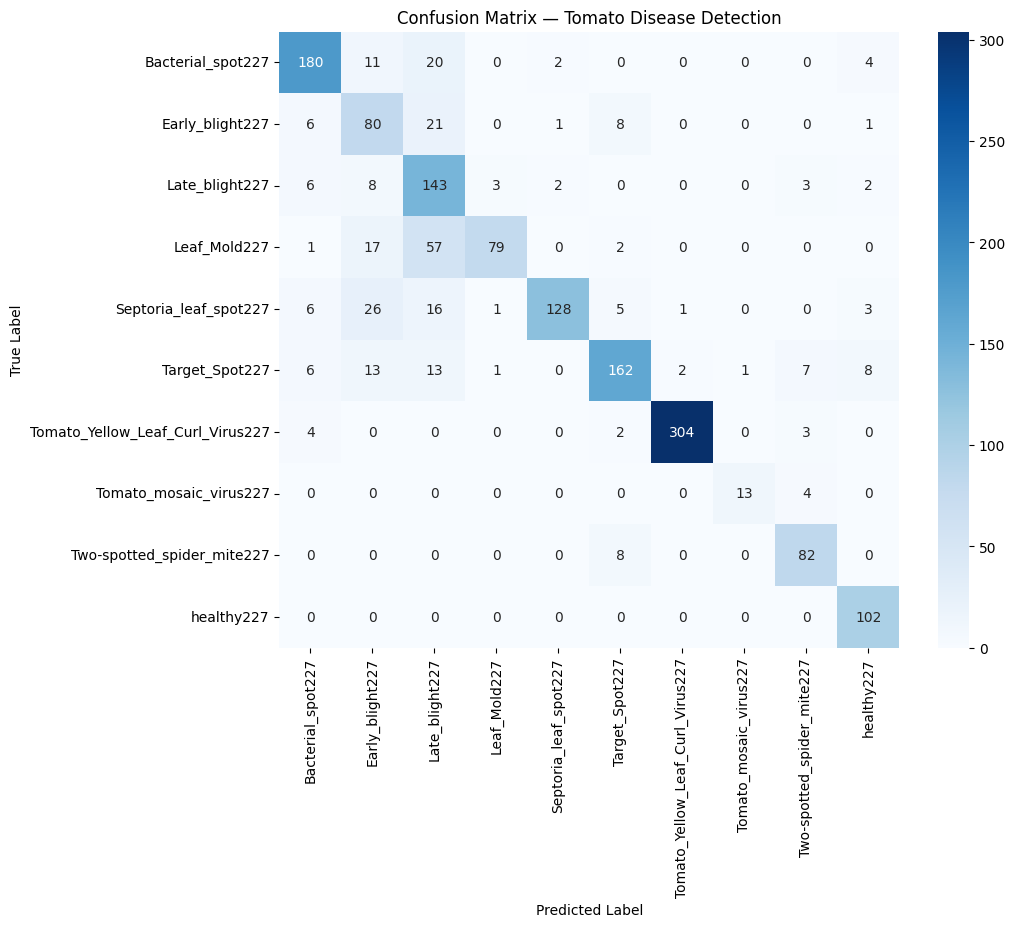

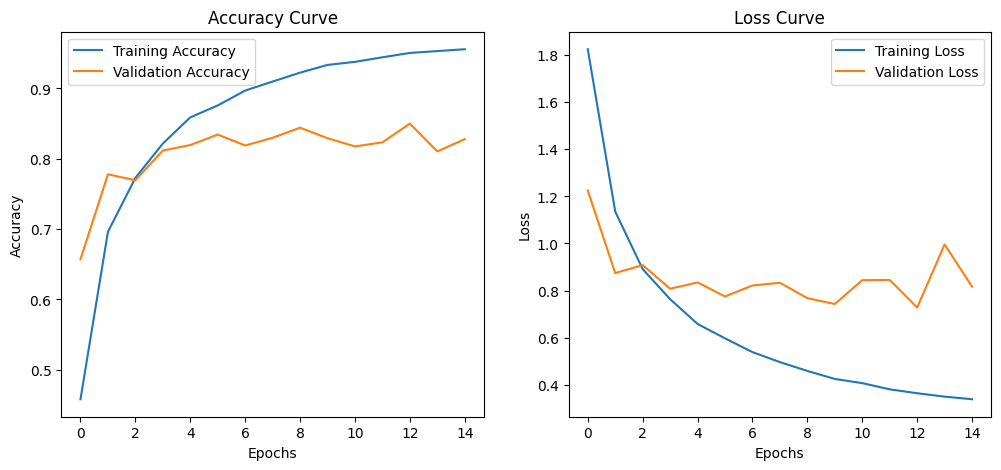

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


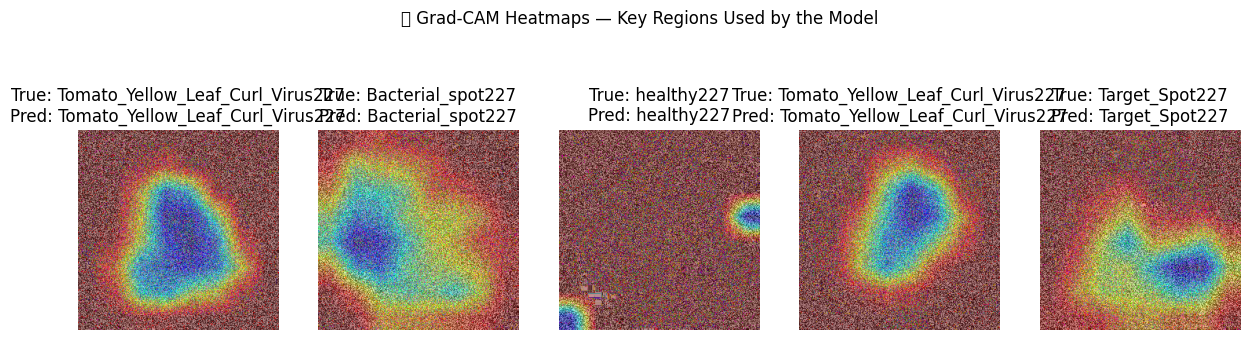

In [22]:
# STEP 12 — Visualization, Metrics, and Grad-CAM Analysis
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import cv2

# ✅ 1️⃣ Load the best fine-tuned model
model = tf.keras.models.load_model("/content/drive/MyDrive/best_model.keras")

# ✅ 2️⃣ Evaluate on test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n🌿 Final Model Test Accuracy: {test_acc*100:.2f}% | Test Loss: {test_loss:.4f}")

# ✅ 3️⃣ Get predictions and true labels
y_true = []
y_pred = []
# Use the already saved class_names variable
# class_names = list(train_ds.class_names)

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# ✅ 4️⃣ Classification report (Precision, Recall, F1-score)
print("\n📈 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# ✅ 5️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix — Tomato Disease Detection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ✅ 6️⃣ Plot Training Curves (Accuracy & Loss)
try:
    acc = history_fast.history['accuracy']
    val_acc = history_fast.history['val_accuracy']
    loss = history_fast.history['loss']
    val_loss = history_fast.history['val_loss']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs'); plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs'); plt.ylabel('Loss')
    plt.legend()

    plt.show()
except:
    print("⚠️ Training history not found. Skipping accuracy/loss plots.")

# ✅ 7️⃣ Grad-CAM Visualization
# Pick a few random test images
sample_images, sample_labels = next(iter(test_ds.take(1)))
layer_name = [layer.name for layer in model.layers if 'conv' in layer.name][-1]  # last conv layer

def generate_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    # Cast both conv_outputs and pooled_grads to float32
    conv_outputs = tf.cast(conv_outputs, tf.float32)
    pooled_grads = tf.cast(pooled_grads, tf.float32)
    # Modified calculation for heatmap
    heatmap = tf.reduce_sum(tf.multiply(conv_outputs, pooled_grads), axis=-1)


    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Display Grad-CAM on 5 random test images
plt.figure(figsize=(15, 8))
for i in range(5):
    img = sample_images[i]
    img_array = np.expand_dims(img, axis=0)
    heatmap = generate_gradcam_heatmap(img_array, model, layer_name)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(np.uint8(img.numpy() * 255), 0.6, heatmap, 0.4, 0)

    plt.subplot(2, 5, i + 1)
    plt.imshow(superimposed_img)
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[y_pred[i]]}")
    plt.axis('off')

plt.suptitle("🌿 Grad-CAM Heatmaps — Key Regions Used by the Model")
plt.show()

After executing the code above, you will have a zip file named `tomato_dataset.zip` in your Colab environment. You'll then need to extract this file. You can use the following command in a new code cell to extract it (replace `tomato_dataset.zip` with the actual name of your downloaded file if it's different):

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Change this to the actual folder name inside your Drive
dataset_path = "/content/drive/MyDrive/Dataset of Tomato Leaves"  #

# Check if files exist
for root, dirs, files in os.walk(dataset_path):
    print("📂 Current folder:", root)
    print("📁 Subfolders:", dirs[:5])
    print("🖼️ Example files:", files[:5])
    break


📂 Current folder: /content/drive/MyDrive/Dataset of Tomato Leaves
📁 Subfolders: ['Dataset of Tomato Leaves', '.ipynb_checkpoints']
🖼️ Example files: []


In [ ]:
!ls "/content/drive/MyDrive/Dataset of Tomato Leaves/Dataset of tomato leaves"


ls: cannot access '/content/drive/MyDrive/Dataset of Tomato Leaves/Dataset of tomato leaves': No such file or directory
